In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from lazypredict import Supervised
from lazypredict.Supervised import LazyRegressor

Supervised.removed_regressors.append('QuantileRegressor')
Supervised.REGRESSORS.remove(('QuantileRegressor', sklearn.linear_model._quantile.QuantileRegressor))
Supervised.removed_regressors.append('RANSACRegressor')
Supervised.REGRESSORS.remove(('RANSACRegressor', sklearn.linear_model.RANSACRegressor))
Supervised.removed_regressors.append('Lars')
Supervised.REGRESSORS.remove(('Lars', sklearn.linear_model.Lars))
Supervised.removed_regressors.append('GammaRegressor')
Supervised.REGRESSORS.remove(('GammaRegressor', sklearn.linear_model.GammaRegressor))
Supervised.removed_regressors.append('PoissonRegressor')
Supervised.REGRESSORS.remove(('PoissonRegressor', sklearn.linear_model.PoissonRegressor))

df = pd.read_csv('AI_Edu_Project/Data/AL_Dist_Cln.csv')

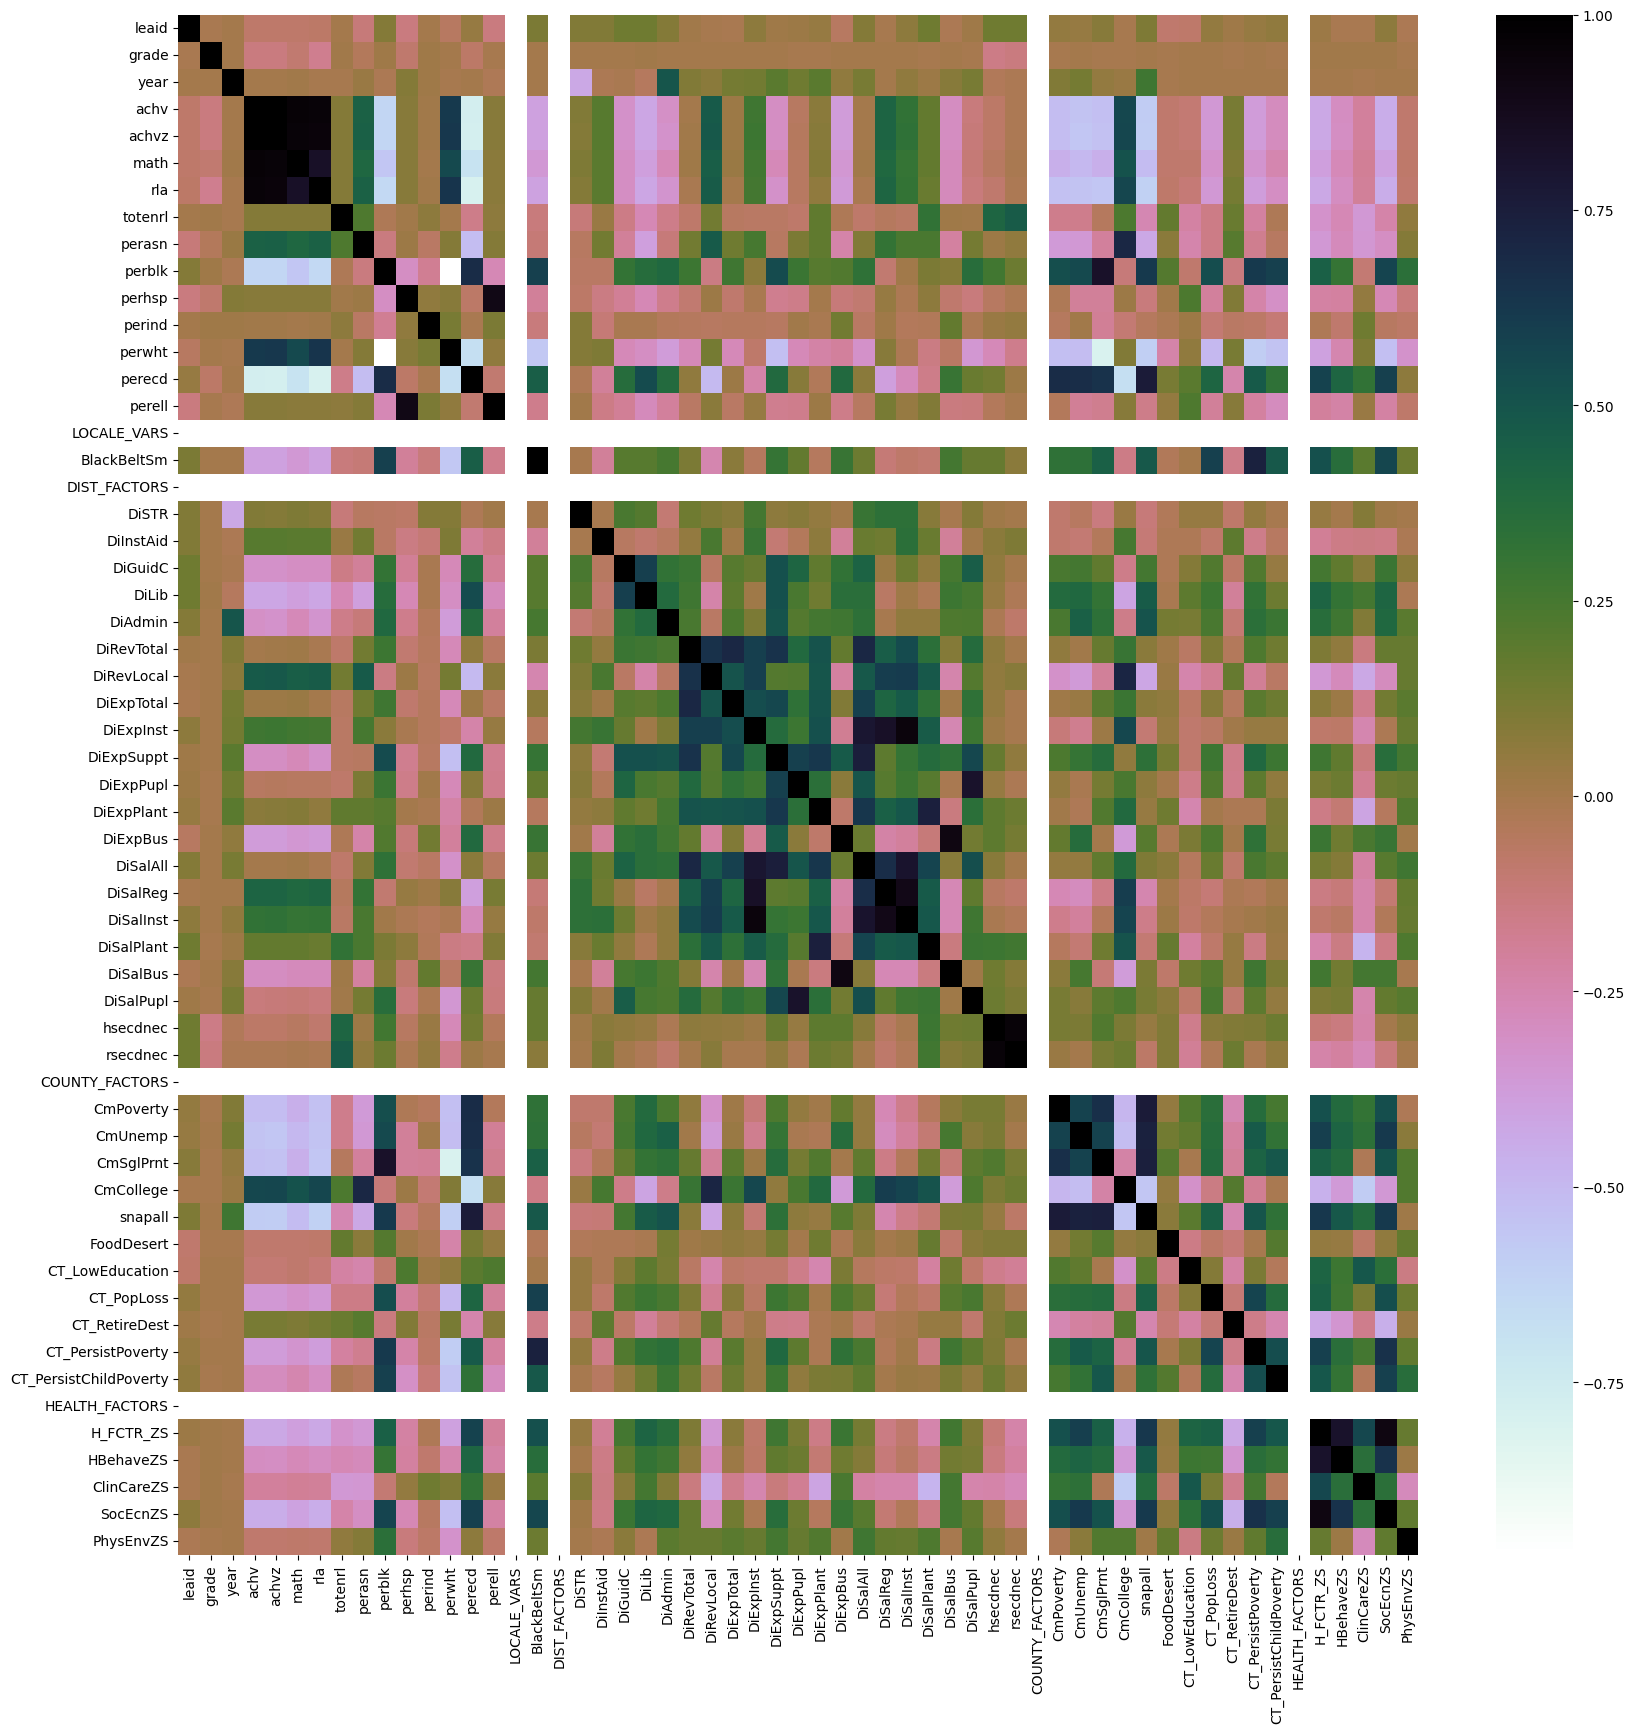

In [2]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='cubehelix_r')
plt.show();

In [3]:
data_unencoded = df.drop(columns=['leaid', 'achv', 'math', 'rla',
                        'LOCALE_VARS', 'DIST_FACTORS', 
                        'COUNTY_FACTORS', 'HEALTH_FACTORS'])

data = pd.get_dummies(data_unencoded, columns=['leanm', 'grade', 'year', 'Locale4', 'Locale3', 'CT_EconType'])
data.fillna(method='ffill', inplace=True)

Text(0.5, 0, 'County')

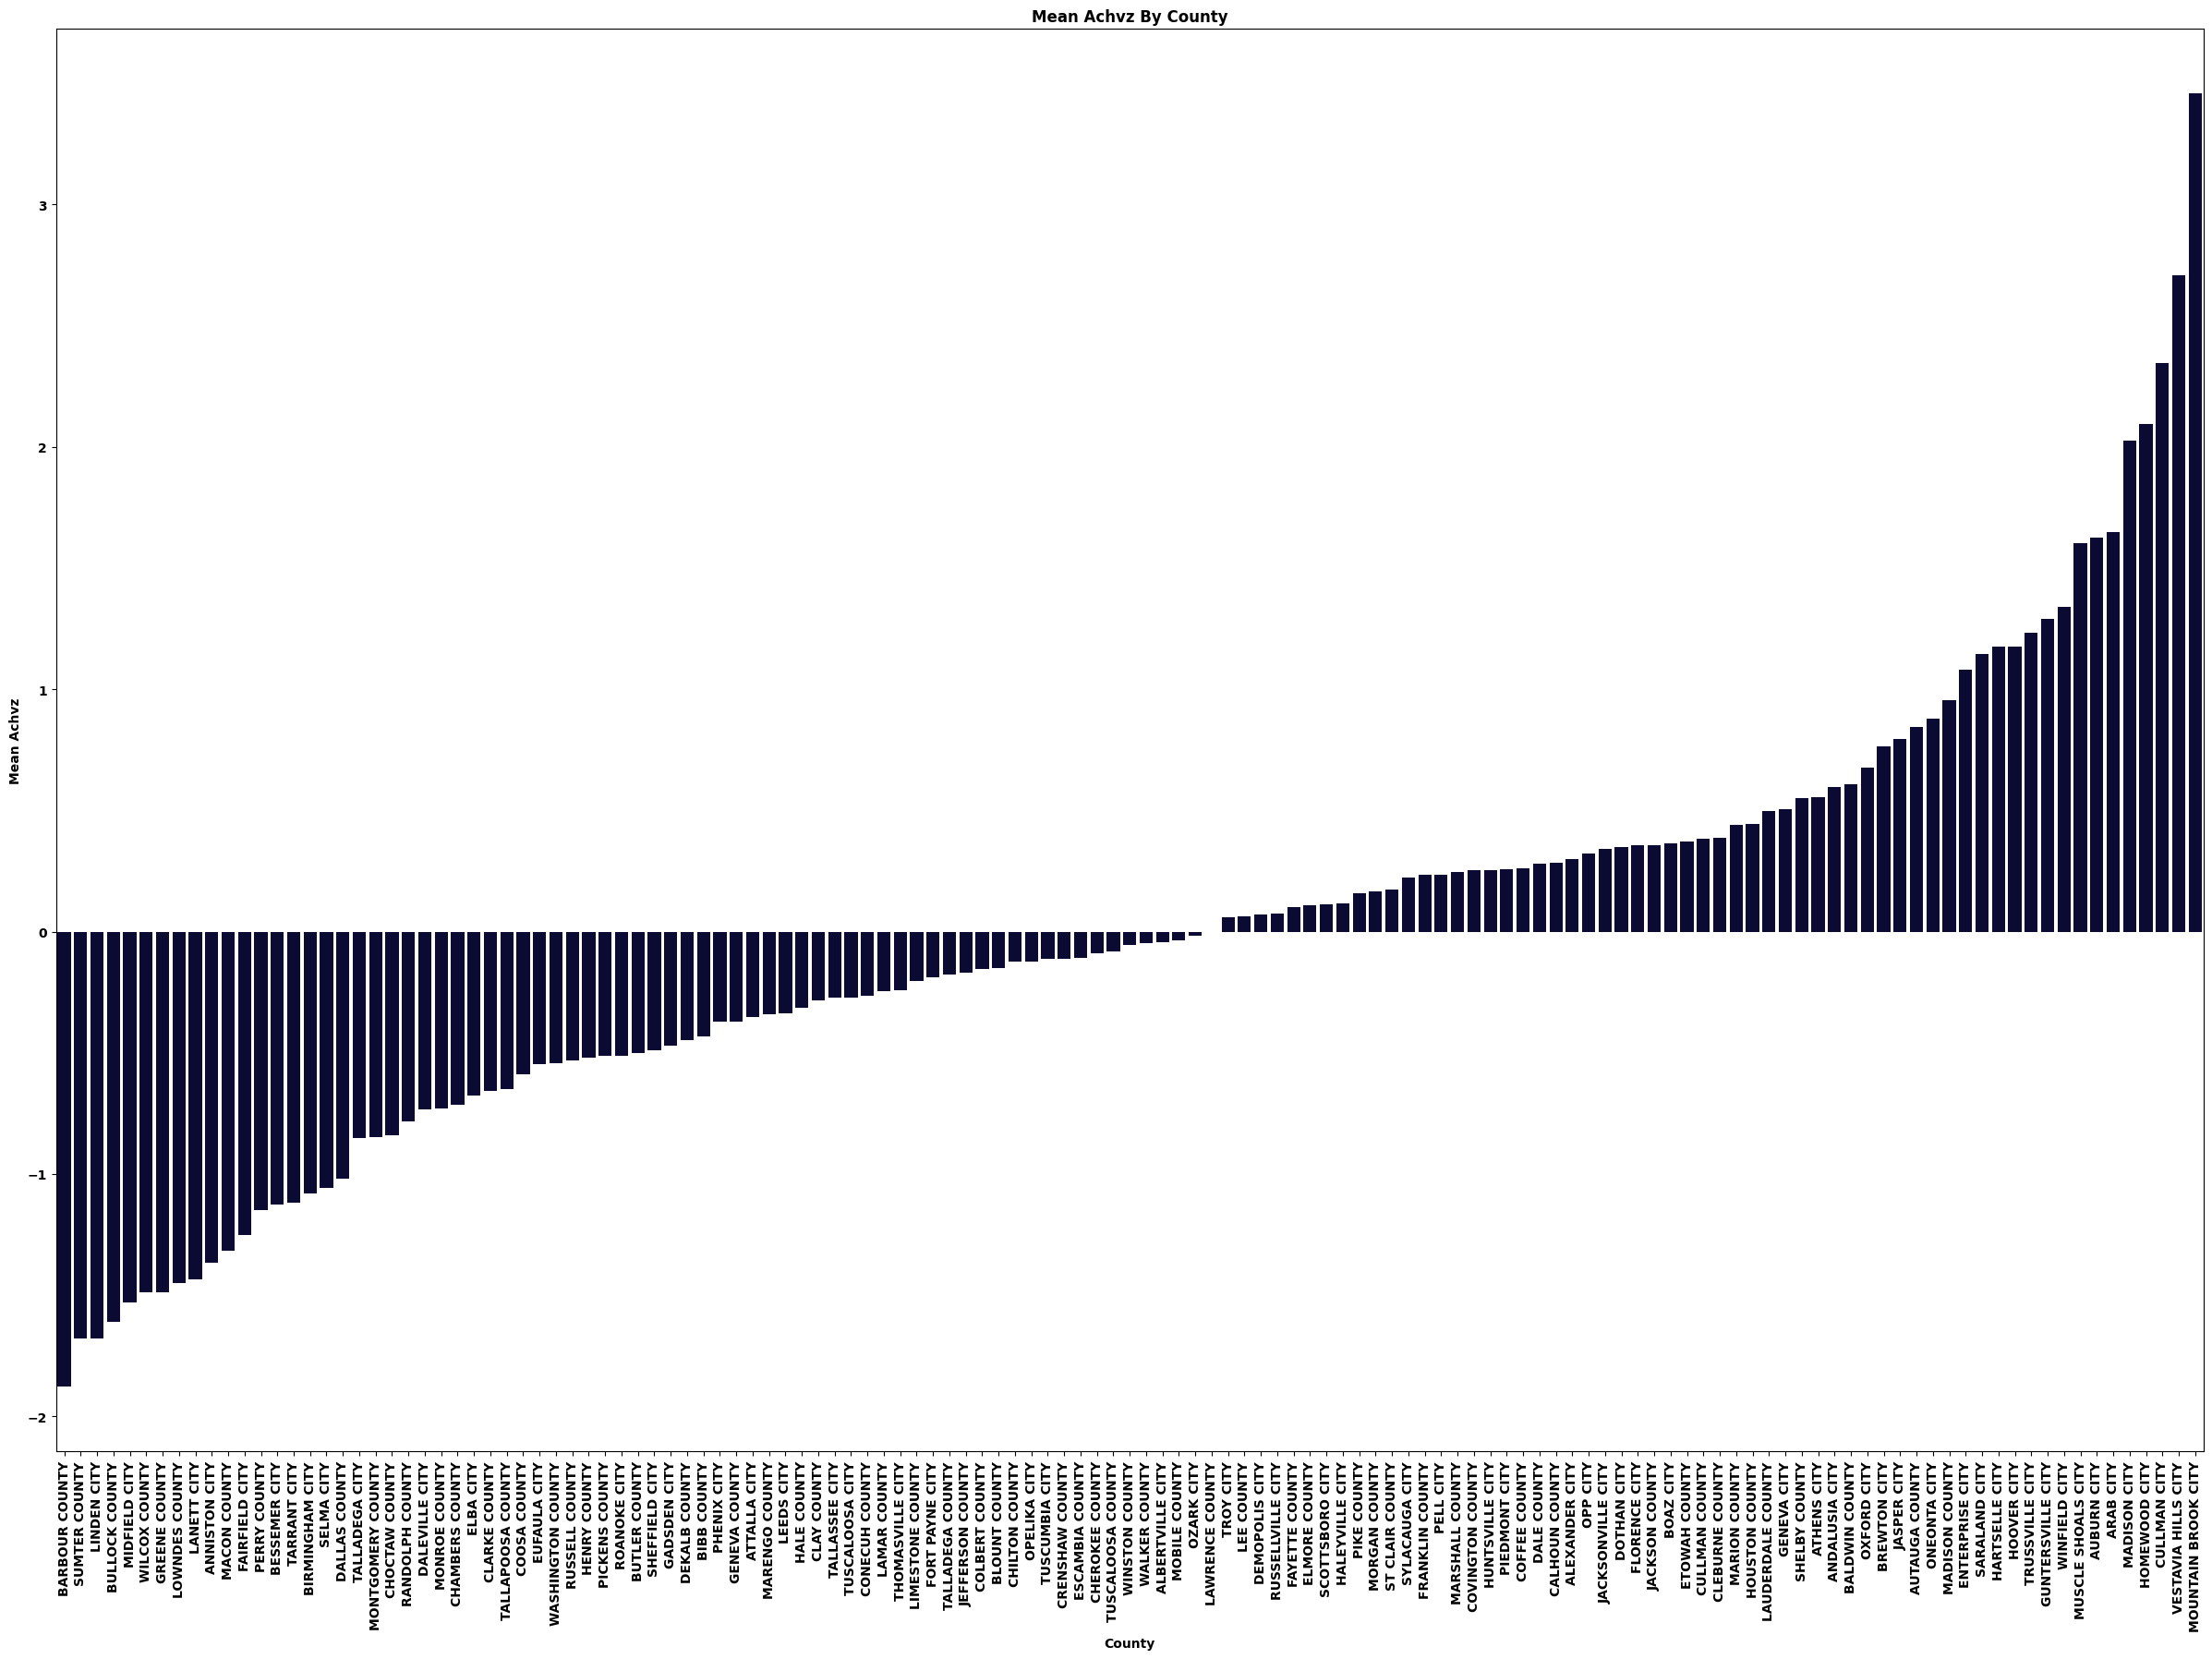

In [4]:
mean_achvz = df.groupby('leanm')['achvz'].mean().reset_index()
mean_achvz = mean_achvz.sort_values(by = 'achvz', ascending = True )

plt.rcParams['font.weight'] = 'bold'
fig, ax = plt.subplots(figsize = (30,20) )
ax = sns.barplot(data = mean_achvz, x = 'leanm', y = 'achvz', color = '#03033a')
plt.xticks(rotation = 90)
plt.title('Mean Achvz By County', weight = 'bold')
plt.ylabel('Mean Achvz', weight = 'bold')
plt.xlabel('County', weight = 'bold')

Text(0.5, 0, 'County')

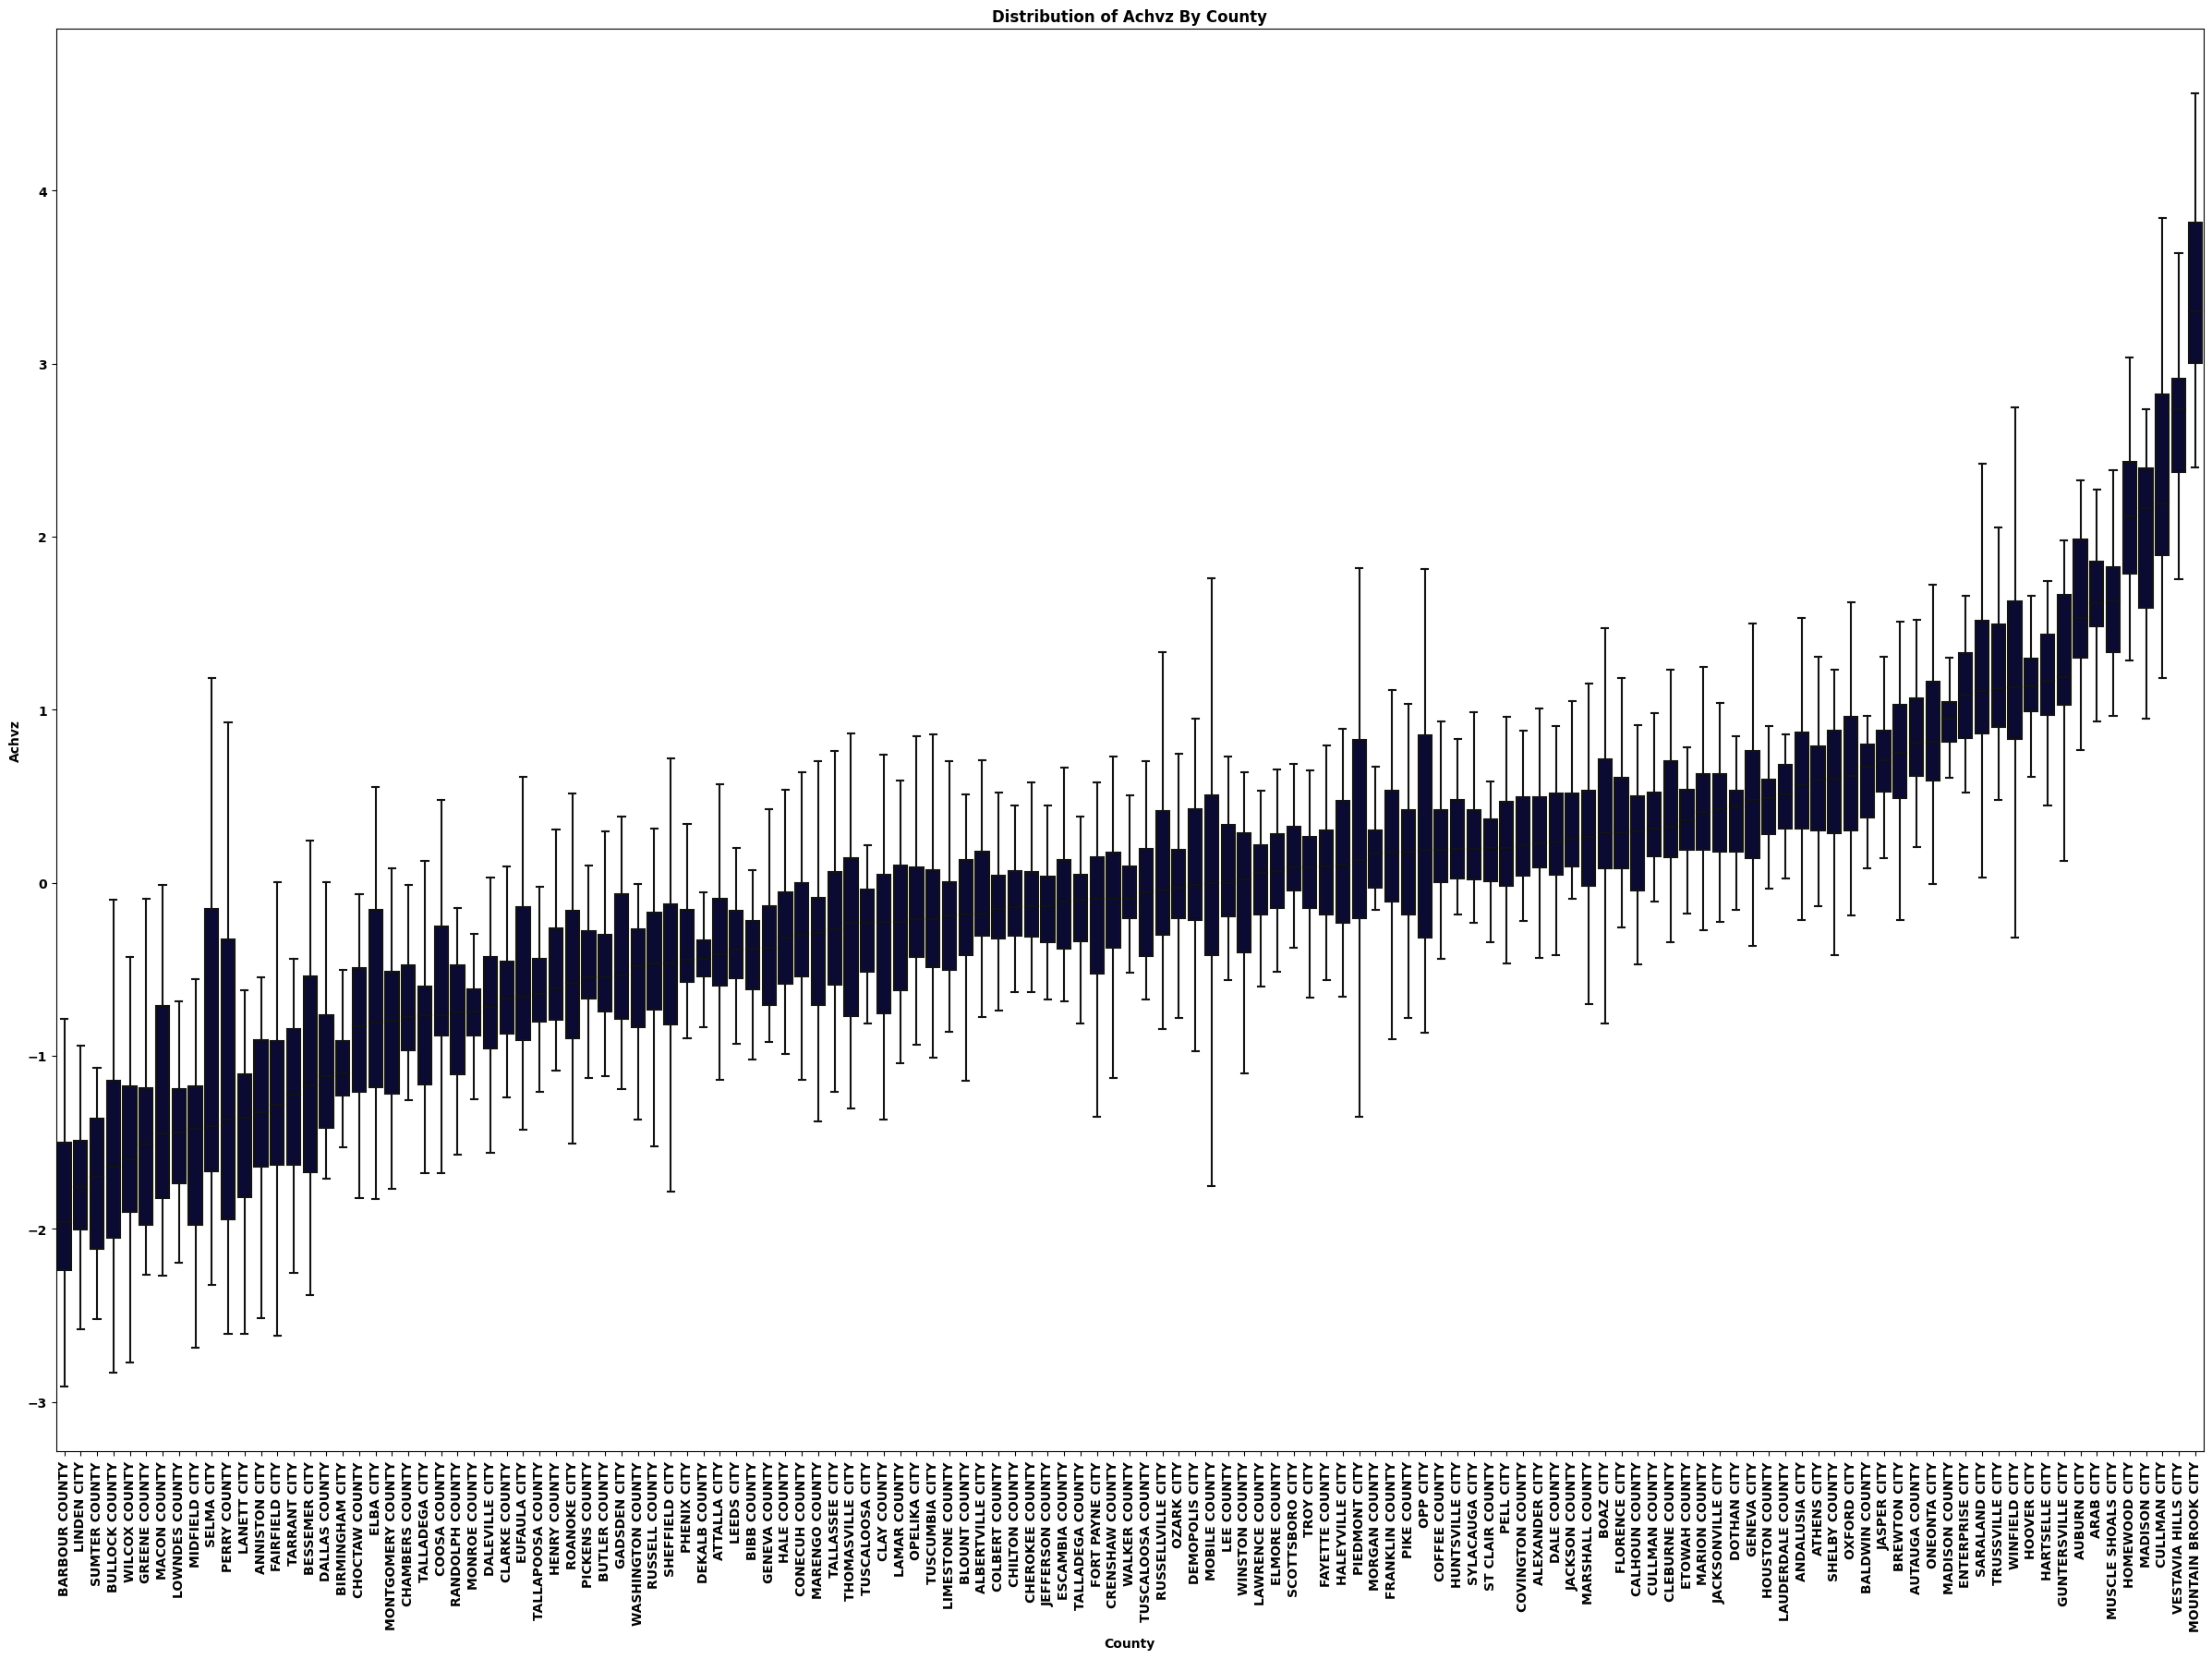

In [5]:
med_achvz = df
med_achvz['median'] = med_achvz.groupby('leanm')['achvz'].transform('median')
med_achvz = med_achvz.sort_values(by='median', ascending=True)

fig, ax = plt.subplots(figsize = (30,20) )

ax = sns.boxplot(data = med_achvz, x = 'leanm', y = 'achvz', color = '#03033a', showfliers=False)
plt.xticks(rotation = 90)

plt.title('Distribution of Achvz By County', weight = 'bold')
plt.ylabel('Achvz', weight = 'bold')
plt.xlabel('County', weight = 'bold')

In [6]:
features = data.drop('achvz', axis=1)
target = data['achvz']
scaled_features = pd.DataFrame(normalize(features), columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state = 42)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

 97%|█████████▋| 36/37 [02:02<00:02,  2.80s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17744
[LightGBM] [Info] Number of data points in the train set: 3744, number of used features: 199
[LightGBM] [Info] Start training from score -0.002745


100%|██████████| 37/37 [02:03<00:00,  3.33s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.81,0.85,0.41,0.72
ExtraTreesRegressor,0.81,0.85,0.41,16.12
HistGradientBoostingRegressor,0.81,0.85,0.41,3.19
SVR,0.81,0.85,0.41,1.76
NuSVR,0.81,0.85,0.41,1.79
XGBRegressor,0.80,0.84,0.43,1.16
RandomForestRegressor,0.79,0.84,0.43,50.40
HuberRegressor,0.78,0.82,0.45,0.82
BaggingRegressor,0.78,0.82,0.45,5.25


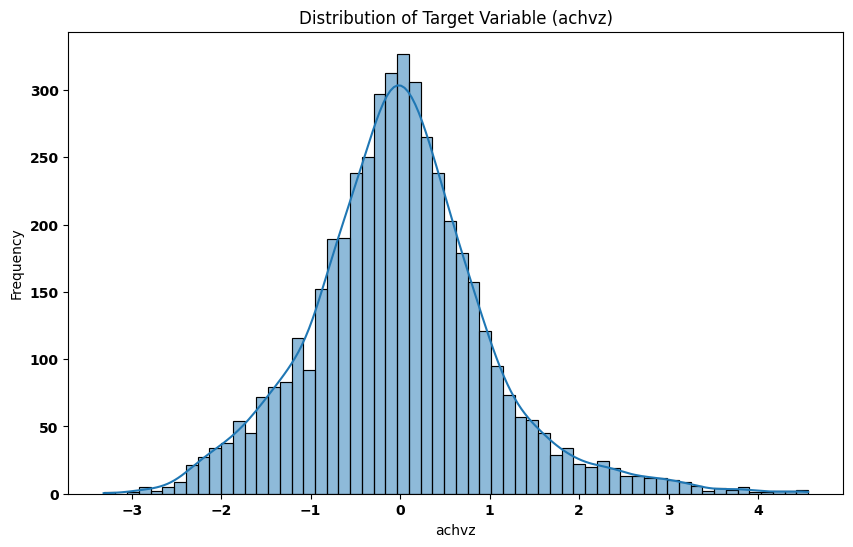

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(target, kde=True)
plt.title('Distribution of Target Variable (achvz)')
plt.xlabel('achvz')
plt.ylabel('Frequency')
plt.show()

In machine learning, R2 is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It is also known as the coefficient of determination. R2 values range from 0 to 1, where:

    R2 = 0 indicates that the model does not explain any of the variability in the dependent variable.
    R2 = 1 indicates that the model explains all the variability in the dependent variable.

In simple terms, R2 provides a measure of how well the predictions of a model match the actual observed outcomes. It is commonly used as a goodness-of-fit measure for regression models. The formula for R2R2 is:

R2 = 1 − (SSresidual / SStotalR2)

where SSresidual​ is the sum of squared residuals (the differences between the observed and predicted values), and SStotal​ is the total sum of squares (a measure of the total variability in the dependent variable).

A higher R2 value generally indicates a better fit of the model to the data, but it's important to note that a high R2R2 does not necessarily mean a model is accurate or that it will generalize well to new data. It is always advisable to consider other evaluation metrics and conduct thorough validation to assess model performance comprehensively.

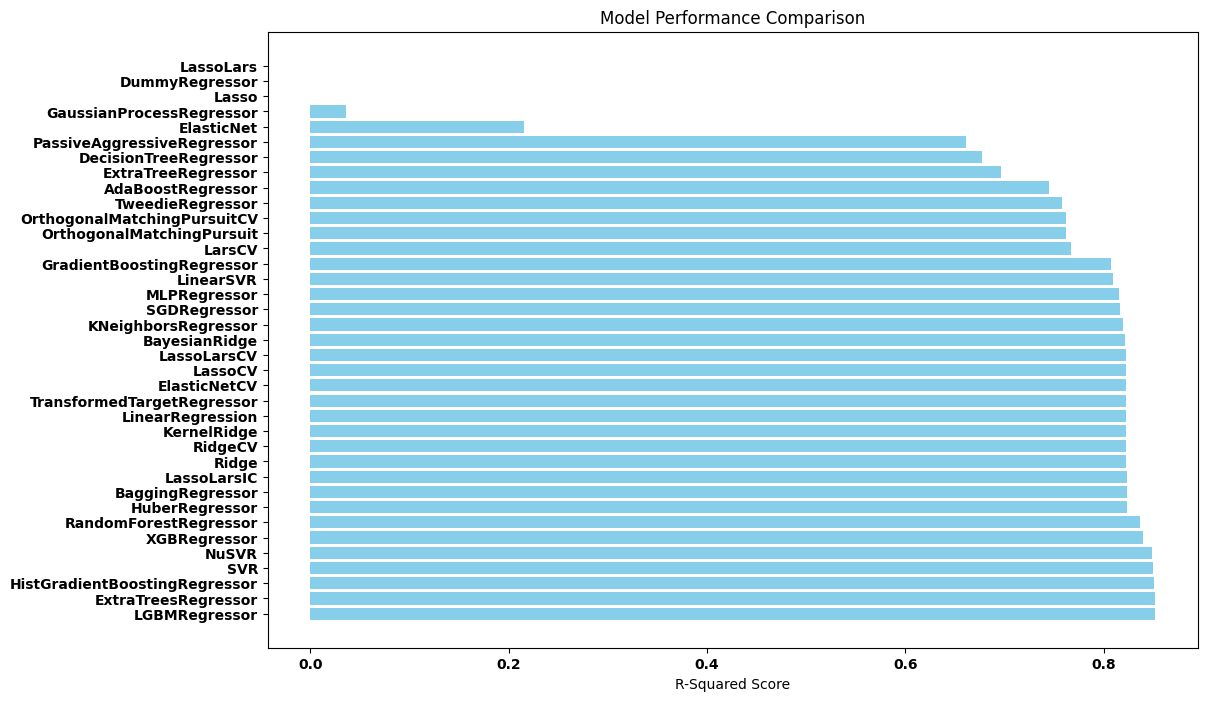

In [8]:
model_names = list(models.index)
r2_scores = list(models['R-Squared'])

plt.figure(figsize=(12, 8))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R-Squared Score')
plt.title('Model Performance Comparison')
plt.show()

Feature importance refers to the measure of the contribution or impact of individual features (variables or input attributes) in a machine learning model towards making predictions or classifications. It provides insights into which features have a stronger influence on the model's output and helps in understanding the relative importance of different input variables.

The concept of feature importance is particularly prevalent in tree-based models, such as decision trees, random forests, and gradient boosting machines, where it is relatively straightforward to quantify the contribution of each feature. However, various techniques exist for estimating feature importance in different types of models.

Here are some common methods for measuring feature importance:

    Decision Trees/Random Forests/Gradient Boosting:
        In these models, feature importance is often determined based on how frequently a feature is used to make decisions across multiple trees in the ensemble. Features that lead to more significant reductions in impurity or error are considered more important.
    
    Permutation Importance:
        This technique involves shuffling the values of a single feature and measuring the change in the model's performance. A significant drop in performance indicates that the feature is important for the model.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17593
[LightGBM] [Info] Number of data points in the train set: 3744, number of used features: 199
[LightGBM] [Info] Start training from score -0.002745


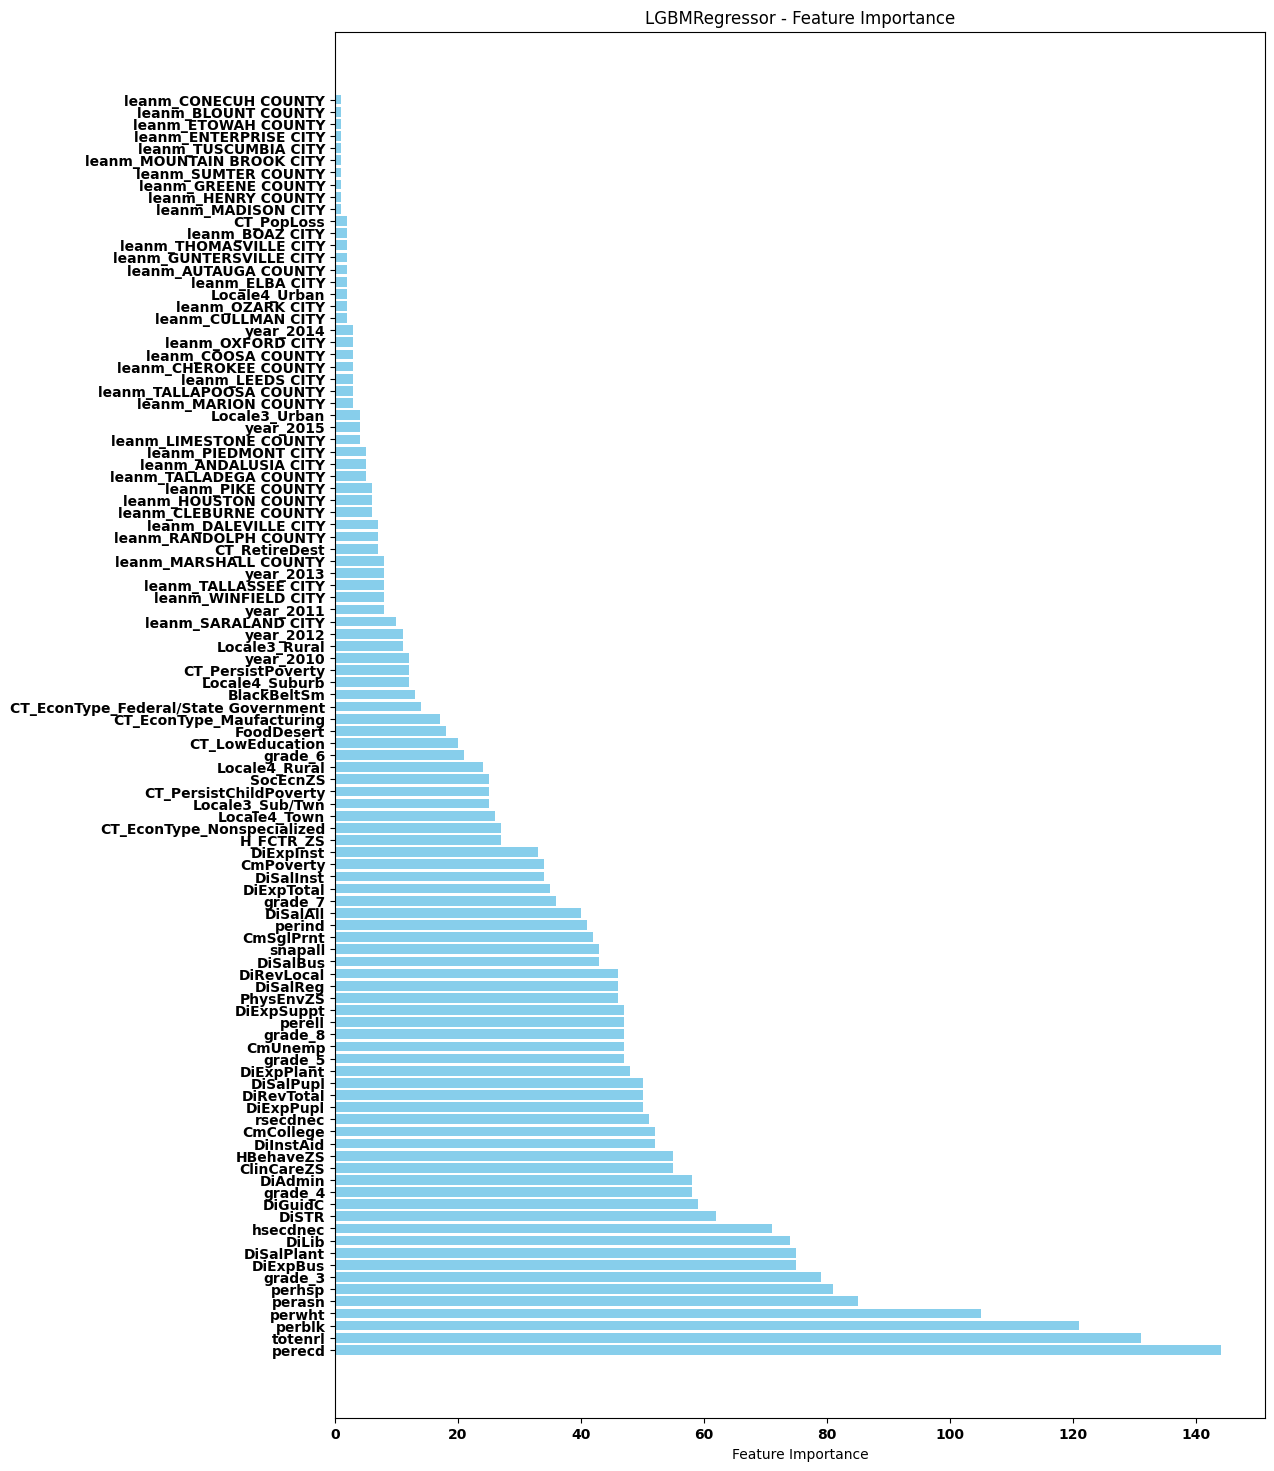

In [9]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

feature_importances = lgbm_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0.001]

plt.figure(figsize=(12, 18))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('LGBMRegressor - Feature Importance')
plt.show()

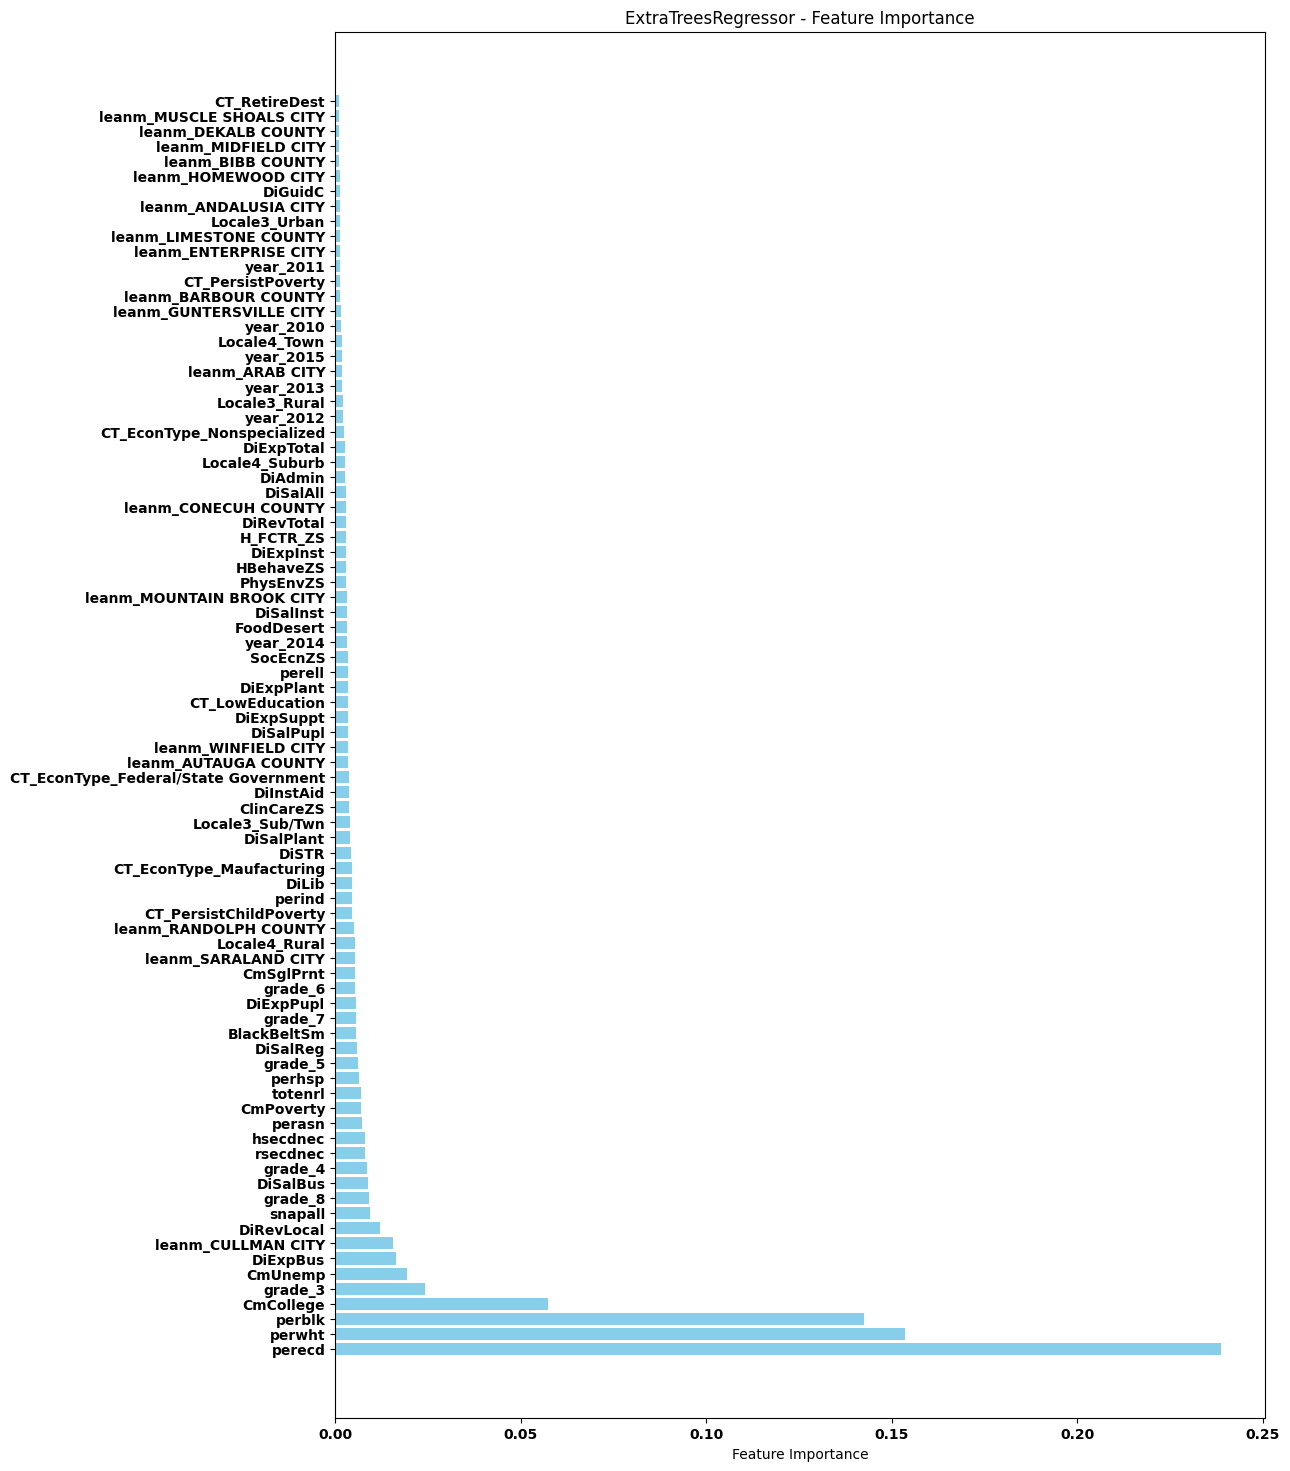

In [10]:
from sklearn.ensemble import ExtraTreesRegressor

etr_model = ExtraTreesRegressor()
etr_model.fit(X_train, y_train)

feature_importances = etr_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0.001]

plt.figure(figsize=(12, 18))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('ExtraTreesRegressor - Feature Importance')
plt.show()

Permutation importance is a technique used to assess the importance of each feature in a machine learning model. It provides a way to evaluate the impact of individual features on the model's performance by measuring how much the model's performance degrades when the values of a specific feature are randomly permuted.

Here's a high-level overview of the permutation importance process:

    Train the Model: Train your machine learning model using the original dataset.

    Evaluate Baseline Performance: Measure the model's performance on a validation set or using a suitable evaluation metric (e.g., mean squared error for regression, accuracy for classification) to establish a baseline.

    Permute Feature Values: Randomly shuffle (permute) the values of a single feature across all samples in the dataset. This effectively breaks any relationship between the feature and the target variable.

    Re-evaluate Performance: Assess the model's performance on the validation set with the permuted feature. The degradation in performance indicates the importance of that particular feature. A more critical feature will lead to a larger drop in performance.

    Repeat for Each Feature: Repeat steps 3-4 for all features in the dataset to calculate the permutation importance for each feature.

    Compare Importances: The greater the decrease in model performance after permuting a feature, the more important that feature is considered.

Permutation importance has some advantages:

    It does not make assumptions about the distribution of the data or the relationship between features and the target.
    It can be applied to any machine learning model, making it model-agnostic.

However, it also has some limitations:

    It can be computationally expensive, especially for large datasets.
    It might give biased results if features are correlated because permuting one feature may affect others.

In Python, scikit-learn provides the permutation_importance function to compute permutation importances for a trained model. This function returns the importances along with confidence intervals, providing a useful tool for feature analysis.

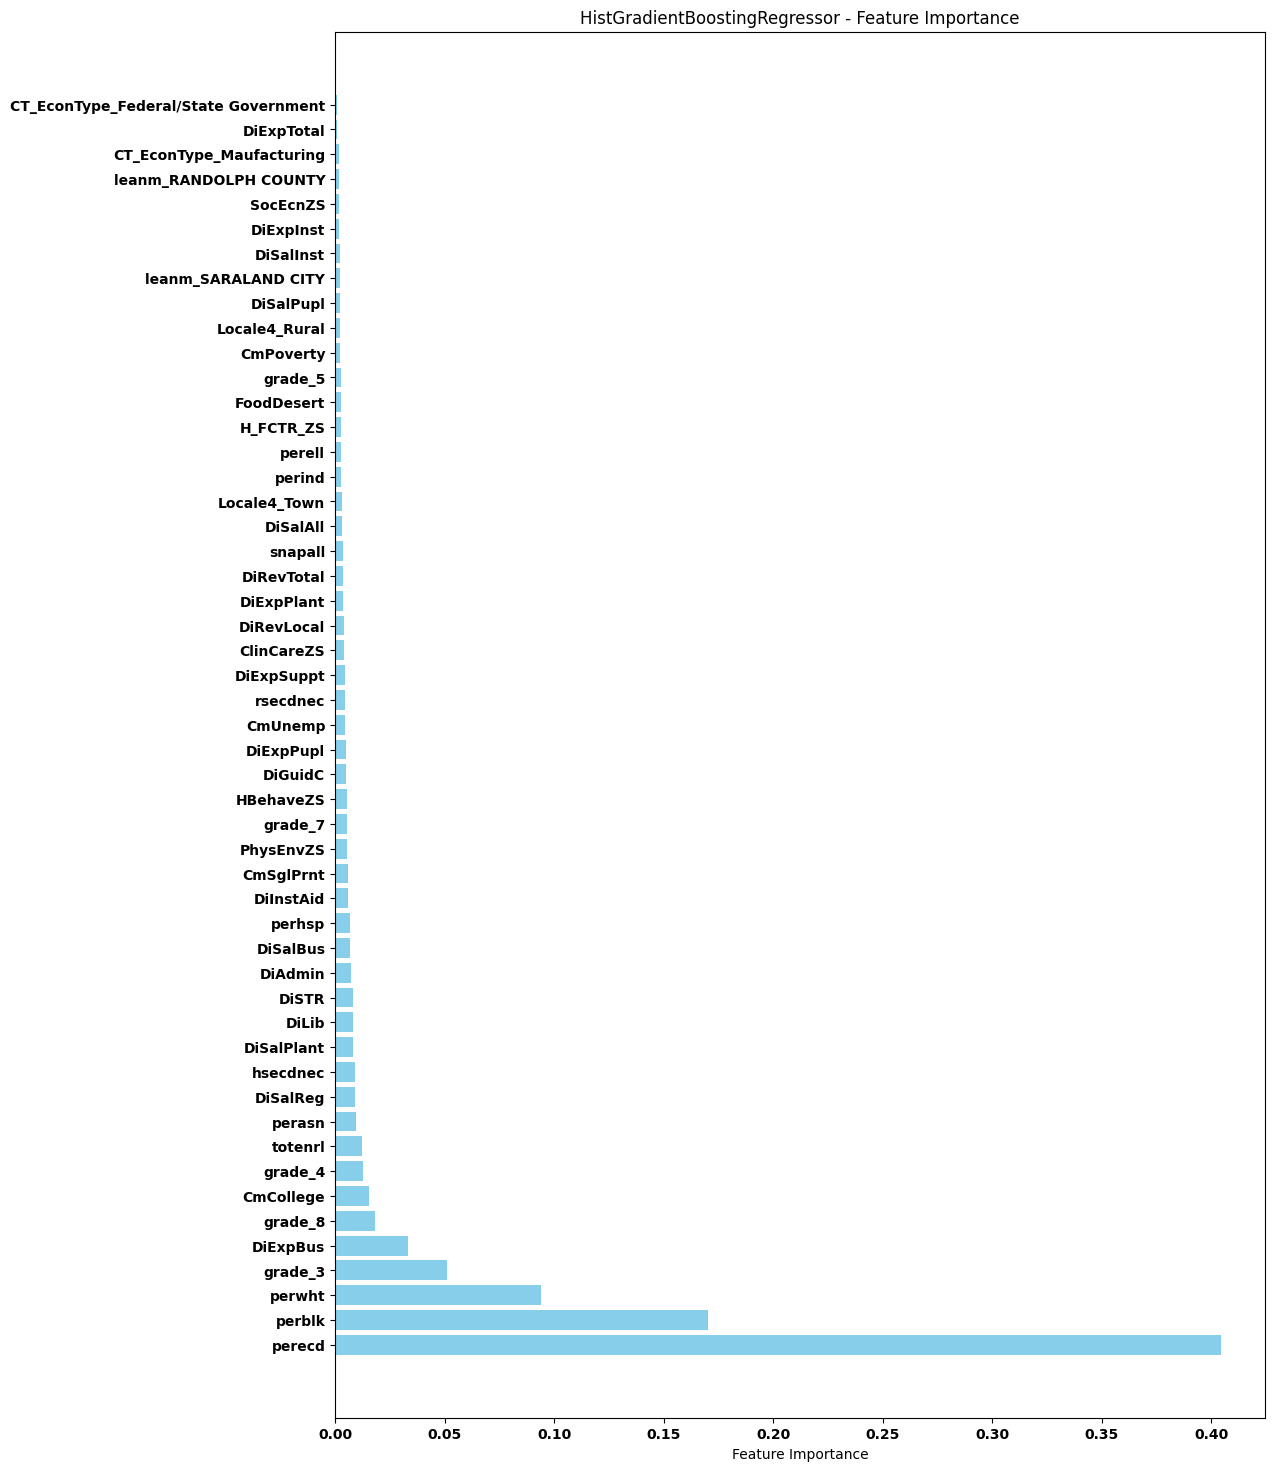

In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

hgb_model = HistGradientBoostingRegressor()
hgb_model.fit(X_train, y_train)

perm_importance = permutation_importance(hgb_model, X_train, y_train, n_repeats=30, random_state=42)

feature_importances = perm_importance.importances_mean
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0.001]

plt.figure(figsize=(12, 18))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('HistGradientBoostingRegressor - Permutation Importance')
plt.show()

In [14]:
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

perm_importance = permutation_importance(svr_model, X_train, y_train, n_repeats=30, random_state=42)
feature_importances = perm_importance.importances_mean
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0.001]

plt.figure(figsize=(12, 18))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('SVR - Permutation Importance')
plt.show()

: 

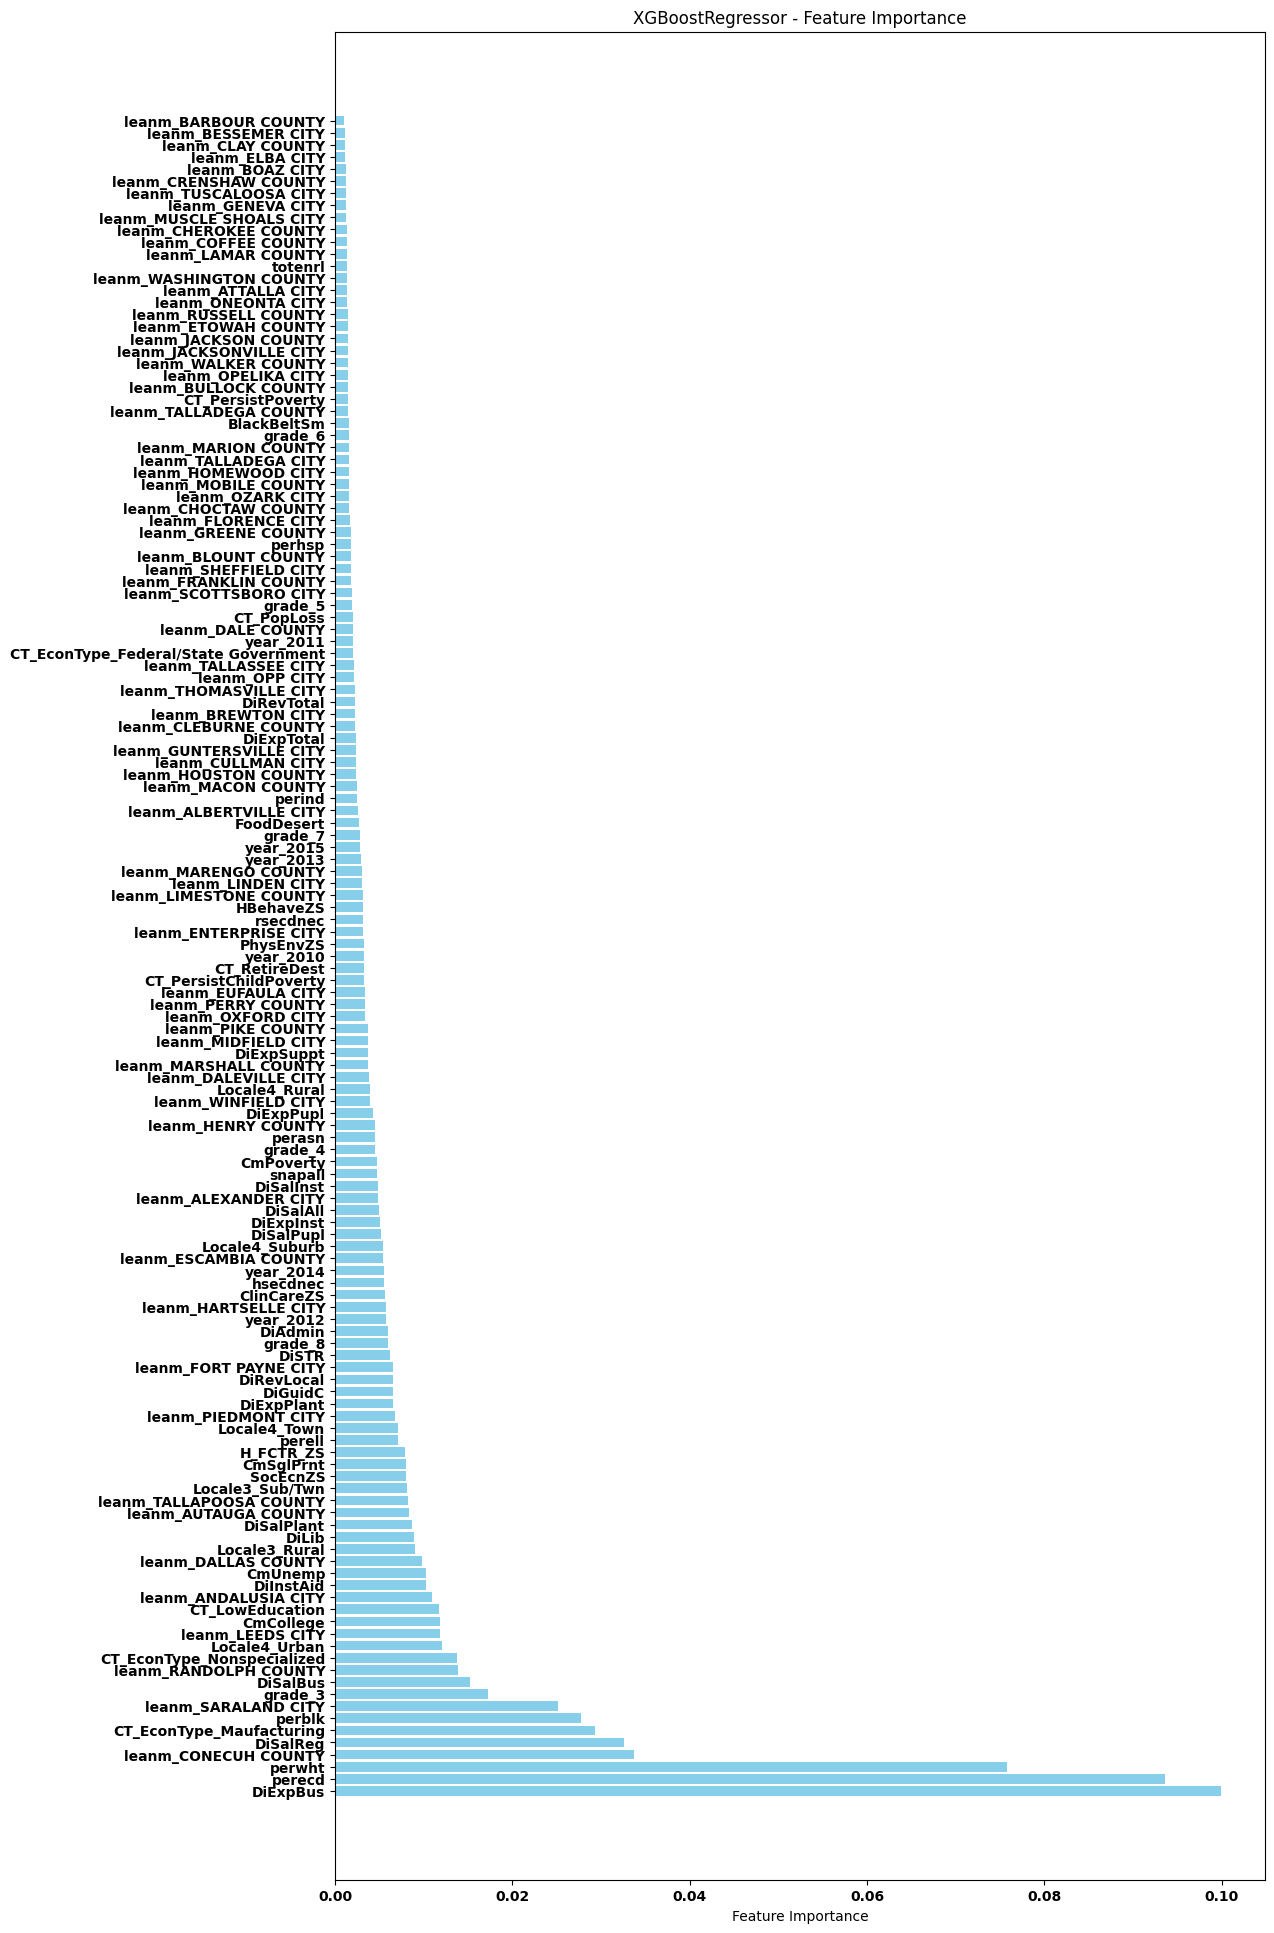

In [11]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0.001]

plt.figure(figsize=(12, 24))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoostRegressor - Feature Importance')
plt.show()